In [127]:
import pandas as pd
import numpy as np
import seaborn as sb

In [128]:
df=pd.read_csv('cleaned_data.csv')

/home/devansh/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [129]:
df=df.drop('Unnamed: 0',axis=1)

In [130]:
gk=df.groupby('RIC')

In [131]:
l=df.RIC.unique()
len(l)

87

In [132]:
df=df.sort_values(['RIC','date'])
df_r=pd.DataFrame(columns=['RIC', 'Start', 'Finish'])

In [133]:
for i in l:
    df_t=gk.get_group(i)
    maxd=df_t['date'].max()
    mind=df_t['date'].min()
    df_r = df_r.append({'RIC':i, 'Start': maxd, 'Finish': mind}, ignore_index=True)
    

In [134]:
df_r

,RIC,Start,Finish
0,10TBc1,2019-07-01,2008-02-20
1,ADc1,2019-07-01,1996-01-01
2,AEXc1,2019-07-01,1996-01-01
3,BAXc1,2019-06-17,1996-01-01
4,BOc1,2019-07-01,1996-01-01
...,...,...,...
82,Wc1,2019-07-01,1996-01-01
83,YAPc1,2019-07-01,2000-05-01
84,YBAc1,2019-07-01,1996-01-01
85,YOc1,2019-06-06,2007-01-08


In [135]:
df_r.to_csv('Start_FInish_RIC.CSV')

In [136]:
df['Asset Class'].value_counts()

Commodities     112457
Fixed Income     91456
Equity           74810
FX               48860
Name: Asset Class, dtype: int64

In [137]:
df

,Open Price,Close Price,High Price,Low Price,Accumulated Volume,Open Interest,Return,RIC,Asset Class,Name,Exchange Country,Exchange,ChainRIC,Spot,RIC12,date
0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,10TBc1,Fixed Income,KR10YR,Korea,KFE,0#10TB:,NaN,NaN,2008-02-20
1,0.000000,0.000000,0.000000,0.000000,0.0,0.0,NaN,10TBc1,Fixed Income,KR10YR,Korea,KFE,0#10TB:,NaN,NaN,2008-02-21
2,0.000000,0.000000,0.000000,0.000000,0.0,0.0,NaN,10TBc1,Fixed Income,KR10YR,Korea,KFE,0#10TB:,NaN,NaN,2008-02-22
3,0.097096,0.095154,0.097096,0.095154,55.0,942.0,inf,10TBc1,Fixed Income,KR10YR,Korea,KFE,0#10TB:,NaN,NaN,2008-03-19
4,0.095471,0.095432,0.095471,0.095134,30.0,942.0,0.002916,10TBc1,Fixed Income,KR10YR,Korea,KFE,0#10TB:,NaN,NaN,2008-03-20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328982,68.658689,68.672603,68.689996,68.655211,209488.0,1320642.0,-0.000419,YTCc1,Fixed Income,10YR Aus,Australia,Australian Stock Exchange Ltd,0#YTC:,NaN,NaN,2019-06-25
328983,68.929158,68.936140,68.946615,68.922175,135107.0,1302979.0,0.003838,YTCc1,Fixed Income,10YR Aus,Australia,Australian Stock Exchange Ltd,0#YTC:,NaN,NaN,2019-06-26
328984,69.179503,69.133951,69.179503,69.116431,191402.0,1316692.0,0.002869,YTCc1,Fixed Income,10YR Aus,Australia,Australian Stock Exchange Ltd,0#YTC:,NaN,NaN,2019-06-27
328985,69.248859,69.269919,69.276939,69.241839,138249.0,1303702.0,0.001967,YTCc1,Fixed Income,10YR Aus,Australia,Australian Stock Exchange Ltd,0#YTC:,NaN,NaN,2019-06-28


In [145]:
df=df.rename(columns={"Close Price": "p"})

In [139]:
df=df.rename(columns={"Accumulated Volume": "v"})

In [140]:
df=df.rename(columns={"Exchange Country": "cont"})

In [141]:
df=df.rename(columns={"Exchange Country": "cont"})

In [142]:
df=df.drop(['ChainRIC','Spot','RIC12'],axis=1)

In [143]:
df=df.drop(['Low Price','High Price','Open Price'],axis=1)

In [146]:
df

,p,v,Open Interest,Return,RIC,Asset Class,Name,cont,Exchange,date
0,0.000000,NaN,NaN,NaN,10TBc1,Fixed Income,KR10YR,Korea,KFE,2008-02-20
1,0.000000,0.0,0.0,NaN,10TBc1,Fixed Income,KR10YR,Korea,KFE,2008-02-21
2,0.000000,0.0,0.0,NaN,10TBc1,Fixed Income,KR10YR,Korea,KFE,2008-02-22
3,0.095154,55.0,942.0,inf,10TBc1,Fixed Income,KR10YR,Korea,KFE,2008-03-19
4,0.095432,30.0,942.0,0.002916,10TBc1,Fixed Income,KR10YR,Korea,KFE,2008-03-20
...,...,...,...,...,...,...,...,...,...,...
328982,68.672603,209488.0,1320642.0,-0.000419,YTCc1,Fixed Income,10YR Aus,Australia,Australian Stock Exchange Ltd,2019-06-25
328983,68.936140,135107.0,1302979.0,0.003838,YTCc1,Fixed Income,10YR Aus,Australia,Australian Stock Exchange Ltd,2019-06-26
328984,69.133951,191402.0,1316692.0,0.002869,YTCc1,Fixed Income,10YR Aus,Australia,Australian Stock Exchange Ltd,2019-06-27
328985,69.269919,138249.0,1303702.0,0.001967,YTCc1,Fixed Income,10YR Aus,Australia,Australian Stock Exchange Ltd,2019-06-28


In [147]:
df['Asset Class'].value_counts()

Commodities     112457
Fixed Income     91456
Equity           74810
FX               48860
Name: Asset Class, dtype: int64

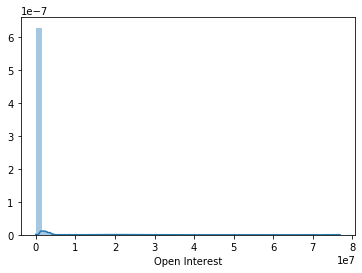

In [48]:
sb.distplot(df['Open Interest'].dropna())

In [54]:
len(df)/(44*125)

59.81581818181818

In [148]:
df['p_cut'] = pd.qcut(df['p'],q=10,labels=False)

In [149]:
df.groupby('p_cut').count()

,p,v,Open Interest,Return,RIC,Asset Class,Name,cont,Exchange,date
p_cut,,,,,,,,,,
0,32900,32845,32862,32832,32900,32900,32900,32900,32900,32900
1,32900,32871,32877,32864,32900,32900,32900,32900,32900,32900
2,32898,32808,32646,32854,32898,32898,32898,32898,32898,32898
3,32902,32863,32834,32870,32902,32902,32902,32902,32902,32902
4,32894,32841,32825,32844,32894,32894,32894,32894,32894,32894
5,32898,32793,32801,32860,32898,32898,32898,32898,32898,32898
6,32899,32853,32810,32859,32899,32899,32899,32899,32899,32899
7,32902,32813,32700,32840,32902,32902,32902,32902,32902,32902
8,32895,32849,32676,32840,32895,32895,32895,32895,32895,32895


In [66]:
df

,p,v,Open Interest,Return,RIC,Asset Class,Name,cont,Exchange,date,p_cut
0,0.000000,NaN,NaN,NaN,10TBc1,Fixed Income,KR10YR,Korea,KFE,2008-02-20,0
1,0.000000,0.0,0.0,NaN,10TBc1,Fixed Income,KR10YR,Korea,KFE,2008-02-21,0
2,0.000000,0.0,0.0,NaN,10TBc1,Fixed Income,KR10YR,Korea,KFE,2008-02-22,0
3,0.095154,55.0,942.0,inf,10TBc1,Fixed Income,KR10YR,Korea,KFE,2008-03-19,0
4,0.095432,30.0,942.0,0.002916,10TBc1,Fixed Income,KR10YR,Korea,KFE,2008-03-20,0
...,...,...,...,...,...,...,...,...,...,...,...
328982,68.672603,209488.0,1320642.0,-0.000419,YTCc1,Fixed Income,10YR Aus,Australia,Australian Stock Exchange Ltd,2019-06-25,4
328983,68.936140,135107.0,1302979.0,0.003838,YTCc1,Fixed Income,10YR Aus,Australia,Australian Stock Exchange Ltd,2019-06-26,4
328984,69.133951,191402.0,1316692.0,0.002869,YTCc1,Fixed Income,10YR Aus,Australia,Australian Stock Exchange Ltd,2019-06-27,4
328985,69.269919,138249.0,1303702.0,0.001967,YTCc1,Fixed Income,10YR Aus,Australia,Australian Stock Exchange Ltd,2019-06-28,4


In [150]:
df['p_cut5'] = pd.qcut(df['p'],q=5,labels=False)

In [151]:
df['v_cut'] = pd.qcut(df['v'],q=5,labels=False)

In [152]:
df['oi_cut'] = pd.qcut(df['Open Interest'],q=10,labels=False)

In [153]:
df['oi_cut5'] = pd.qcut(df['Open Interest'],q=5,labels=False)

In [156]:
df.groupby('oi_cut').count()

,p,v,Open Interest,Return,RIC,Asset Class,Name,cont,Exchange,date,p_cut,p_cut5,v_cut,oi_cut5
oi_cut,,,,,,,,,,,,,,
0.0,32638,32527,32638,32555,32638,32638,32638,32638,32638,32638,32638,32638,32638,32638
1.0,32641,32609,32641,32608,32641,32641,32641,32641,32641,32641,32641,32641,32641,32641
2.0,32635,32621,32635,32602,32635,32635,32635,32635,32635,32635,32635,32635,32635,32635
3.0,32639,32617,32639,32623,32639,32639,32639,32639,32639,32639,32639,32639,32639,32639
4.0,32637,32629,32637,32629,32637,32637,32637,32637,32637,32637,32637,32637,32637,32637
5.0,32641,32609,32641,32622,32641,32641,32641,32641,32641,32641,32641,32641,32641,32641
6.0,32635,32619,32635,32612,32635,32635,32635,32635,32635,32635,32635,32635,32635,32635
7.0,32638,32607,32638,32612,32638,32638,32638,32638,32638,32638,32638,32638,32638,32638
8.0,32638,32629,32638,32621,32638,32638,32638,32638,32638,32638,32638,32638,32638,32638


In [78]:
df

,p,v,Open Interest,Return,RIC,Asset Class,Name,cont,Exchange,date,p_cut,p_cut5,v_cut,oi_cut,oi_cut5
0,0.000000,NaN,NaN,NaN,10TBc1,Fixed Income,KR10YR,Korea,KFE,2008-02-20,0,0,0,NaN,NaN
1,0.000000,0.0,0.0,NaN,10TBc1,Fixed Income,KR10YR,Korea,KFE,2008-02-21,0,0,0,0.0,0.0
2,0.000000,0.0,0.0,NaN,10TBc1,Fixed Income,KR10YR,Korea,KFE,2008-02-22,0,0,0,0.0,0.0
3,0.095154,55.0,942.0,inf,10TBc1,Fixed Income,KR10YR,Korea,KFE,2008-03-19,0,0,0,1.0,0.0
4,0.095432,30.0,942.0,0.002916,10TBc1,Fixed Income,KR10YR,Korea,KFE,2008-03-20,0,0,0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328982,68.672603,209488.0,1320642.0,-0.000419,YTCc1,Fixed Income,10YR Aus,Australia,Australian Stock Exchange Ltd,2019-06-25,4,2,4,9.0,4.0
328983,68.936140,135107.0,1302979.0,0.003838,YTCc1,Fixed Income,10YR Aus,Australia,Australian Stock Exchange Ltd,2019-06-26,4,2,4,9.0,4.0
328984,69.133951,191402.0,1316692.0,0.002869,YTCc1,Fixed Income,10YR Aus,Australia,Australian Stock Exchange Ltd,2019-06-27,4,2,4,9.0,4.0
328985,69.269919,138249.0,1303702.0,0.001967,YTCc1,Fixed Income,10YR Aus,Australia,Australian Stock Exchange Ltd,2019-06-28,4,2,4,9.0,4.0


In [175]:
df['Name'].value_counts()


Brent Crude Oil                                        6013
STIR EURIBOR 3M                                        5999
10YR Aus                                               5996
STIR 90D Bank Bills                                    5995
AEX Index                                              5992
                                                       ... 
Eurex MSCI Philippines Index Future Chain Contracts     331
HUF                                                     276
Eurex MSCI Mexico Index Future Chain Contracts          276
CZK                                                     224
Eurex MSCI UK Index Future Chain Contracts               73
Name: Name, Length: 86, dtype: int64

In [157]:
#df.at[0,'oi_cut'].isna()
#df.loc[df['First Season'] > 1990, 'First Season'] = 1
pd.isna(df.at[0,'oi_cut'])

False

In [154]:
df.loc[pd.isna(df['oi_cut']),'oi_cut']=10
df.loc[pd.isna(df['oi_cut5']),'oi_cut5']=5
df.loc[pd.isna(df['p_cut']),'p_cut']=10
df.loc[pd.isna(df['p_cut5']),'p_cut5']=5
df.loc[pd.isna(df['v_cut']),'v_cut']=5

In [155]:
df

,p,v,Open Interest,Return,RIC,Asset Class,Name,cont,Exchange,date,p_cut,p_cut5,v_cut,oi_cut,oi_cut5
0,0.000000,NaN,NaN,NaN,10TBc1,Fixed Income,KR10YR,Korea,KFE,2008-02-20,0,0,5.0,10.0,5.0
1,0.000000,0.0,0.0,NaN,10TBc1,Fixed Income,KR10YR,Korea,KFE,2008-02-21,0,0,0.0,0.0,0.0
2,0.000000,0.0,0.0,NaN,10TBc1,Fixed Income,KR10YR,Korea,KFE,2008-02-22,0,0,0.0,0.0,0.0
3,0.095154,55.0,942.0,inf,10TBc1,Fixed Income,KR10YR,Korea,KFE,2008-03-19,0,0,0.0,1.0,0.0
4,0.095432,30.0,942.0,0.002916,10TBc1,Fixed Income,KR10YR,Korea,KFE,2008-03-20,0,0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328982,68.672603,209488.0,1320642.0,-0.000419,YTCc1,Fixed Income,10YR Aus,Australia,Australian Stock Exchange Ltd,2019-06-25,4,2,4.0,9.0,4.0
328983,68.936140,135107.0,1302979.0,0.003838,YTCc1,Fixed Income,10YR Aus,Australia,Australian Stock Exchange Ltd,2019-06-26,4,2,4.0,9.0,4.0
328984,69.133951,191402.0,1316692.0,0.002869,YTCc1,Fixed Income,10YR Aus,Australia,Australian Stock Exchange Ltd,2019-06-27,4,2,4.0,9.0,4.0
328985,69.269919,138249.0,1303702.0,0.001967,YTCc1,Fixed Income,10YR Aus,Australia,Australian Stock Exchange Ltd,2019-06-28,4,2,4.0,9.0,4.0


In [124]:
df

,p,v,Open Interest,Return,RIC,Asset Class,Name,cont,Exchange,date,p_cut,p_cut5,v_cut,oi_cut,oi_cut5
0,0.000000,NaN,NaN,NaN,10TBc1,Fixed Income,KR10YR,Korea,KFE,2008-02-20,0,0,0,5.0,NaN
1,0.000000,0.0,0.0,NaN,10TBc1,Fixed Income,KR10YR,Korea,KFE,2008-02-21,0,0,0,0.0,0.0
2,0.000000,0.0,0.0,NaN,10TBc1,Fixed Income,KR10YR,Korea,KFE,2008-02-22,0,0,0,0.0,0.0
3,0.095154,55.0,942.0,inf,10TBc1,Fixed Income,KR10YR,Korea,KFE,2008-03-19,0,0,0,1.0,0.0
4,0.095432,30.0,942.0,0.002916,10TBc1,Fixed Income,KR10YR,Korea,KFE,2008-03-20,0,0,0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328982,68.672603,209488.0,1320642.0,-0.000419,YTCc1,Fixed Income,10YR Aus,Australia,Australian Stock Exchange Ltd,2019-06-25,4,2,2,9.0,4.0
328983,68.936140,135107.0,1302979.0,0.003838,YTCc1,Fixed Income,10YR Aus,Australia,Australian Stock Exchange Ltd,2019-06-26,4,2,2,9.0,4.0
328984,69.133951,191402.0,1316692.0,0.002869,YTCc1,Fixed Income,10YR Aus,Australia,Australian Stock Exchange Ltd,2019-06-27,4,2,2,9.0,4.0
328985,69.269919,138249.0,1303702.0,0.001967,YTCc1,Fixed Income,10YR Aus,Australia,Australian Stock Exchange Ltd,2019-06-28,4,2,2,9.0,4.0


In [163]:
df['Bucket5']=df.apply(lambda row: str(row.p_cut5)+"::"+str(row.v_cut)+"::"+str(row['oi_cut5'])+"::"+str(row['Asset Class'])+"::"+str(row['cont']),axis=1)

In [172]:
df=df.sort_values(['date','Name'])
df.reset_index(drop=True)

,p,v,Open Interest,Return,RIC,Asset Class,Name,cont,Exchange,date,p_cut,p_cut5,v_cut,oi_cut,oi_cut5,Bucket5,Bucket
0,68.389940,NaN,NaN,NaN,YTCc1,Fixed Income,10YR Aus,Australia,Australian Stock Exchange Ltd,1996-01-01,4,2,5.0,10.0,5.0,2::5.0::5.0::Fixed Income::Australia,4::10.0::Fixed Income::Australia
1,82.551276,NaN,15182.0,NaN,CGBc1,Fixed Income,10YR Canada,Canada,Montreal Exchange,1996-01-01,5,2,5.0,2.0,1.0,2::5.0::1.0::Fixed Income::Canada,5::2.0::Fixed Income::Canada
2,114.500000,NaN,NaN,NaN,TYc1,Fixed Income,10YR US T-Note,USA,CBOT,1996-01-01,6,3,5.0,10.0,5.0,3::5.0::5.0::Fixed Income::USA,6::10.0::Fixed Income::USA
3,110.343750,NaN,NaN,NaN,FVc1,Fixed Income,5YR US T-Note,USA,CBOT,1996-01-01,6,3,5.0,10.0,5.0,3::5.0::5.0::Fixed Income::USA,6::10.0::Fixed Income::USA
4,286.986644,NaN,NaN,NaN,AEXc1,Equity,AEX Index,Netherlands,Euronext Amsterdam,1996-01-01,7,3,5.0,10.0,5.0,3::5.0::5.0::Equity::Netherlands,7::10.0::Equity::Netherlands
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328982,8.840000,16083.0,5046.0,-0.018323,Sc1,Commodities,Soybeans,USA,NYMEX,2019-07-01,4,2,2.0,2.0,1.0,2::2.0::1.0::Commodities::USA,4::2.0::Commodities::USA
328983,14.636171,73011.0,514778.0,0.019664,JTIc1,Equity,TOPIX,Japan,Tokyo Stock Exchange,2019-07-01,4,2,3.0,9.0,4.0,2::3.0::4.0::Equity::Japan,4::9.0::Equity::Japan
328984,155.156250,NaN,NaN,-0.002411,USc1,Fixed Income,US T-Bond,USA,CBOT,2019-07-01,6,3,5.0,10.0,5.0,3::5.0::5.0::Fixed Income::USA,6::10.0::Fixed Income::USA
328985,5.127500,80265.0,119987.0,-0.027040,Wc1,Commodities,Wheat,USA,NYMEX,2019-07-01,3,1,4.0,6.0,3.0,1::4.0::3.0::Commodities::USA,3::6.0::Commodities::USA


In [165]:
df['Bucket']=df.apply(lambda row: str(row.p_cut)+"::"+str(row['oi_cut'])+"::"+str(row['Asset Class'])+"::"+str(row['cont']),axis=1)

In [166]:
df

,p,v,Open Interest,Return,RIC,Asset Class,Name,cont,Exchange,date,p_cut,p_cut5,v_cut,oi_cut,oi_cut5,Bucket5,Bucket
0,0.000000,NaN,NaN,NaN,10TBc1,Fixed Income,KR10YR,Korea,KFE,2008-02-20,0,0,5.0,10.0,5.0,0::5.0::5.0::Fixed Income::Korea,0::10.0::Fixed Income::Korea
1,0.000000,0.0,0.0,NaN,10TBc1,Fixed Income,KR10YR,Korea,KFE,2008-02-21,0,0,0.0,0.0,0.0,0::0.0::0.0::Fixed Income::Korea,0::0.0::Fixed Income::Korea
2,0.000000,0.0,0.0,NaN,10TBc1,Fixed Income,KR10YR,Korea,KFE,2008-02-22,0,0,0.0,0.0,0.0,0::0.0::0.0::Fixed Income::Korea,0::0.0::Fixed Income::Korea
3,0.095154,55.0,942.0,inf,10TBc1,Fixed Income,KR10YR,Korea,KFE,2008-03-19,0,0,0.0,1.0,0.0,0::0.0::0.0::Fixed Income::Korea,0::1.0::Fixed Income::Korea
4,0.095432,30.0,942.0,0.002916,10TBc1,Fixed Income,KR10YR,Korea,KFE,2008-03-20,0,0,0.0,1.0,0.0,0::0.0::0.0::Fixed Income::Korea,0::1.0::Fixed Income::Korea
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328982,68.672603,209488.0,1320642.0,-0.000419,YTCc1,Fixed Income,10YR Aus,Australia,Australian Stock Exchange Ltd,2019-06-25,4,2,4.0,9.0,4.0,2::4.0::4.0::Fixed Income::Australia,4::9.0::Fixed Income::Australia
328983,68.936140,135107.0,1302979.0,0.003838,YTCc1,Fixed Income,10YR Aus,Australia,Australian Stock Exchange Ltd,2019-06-26,4,2,4.0,9.0,4.0,2::4.0::4.0::Fixed Income::Australia,4::9.0::Fixed Income::Australia
328984,69.133951,191402.0,1316692.0,0.002869,YTCc1,Fixed Income,10YR Aus,Australia,Australian Stock Exchange Ltd,2019-06-27,4,2,4.0,9.0,4.0,2::4.0::4.0::Fixed Income::Australia,4::9.0::Fixed Income::Australia
328985,69.269919,138249.0,1303702.0,0.001967,YTCc1,Fixed Income,10YR Aus,Australia,Australian Stock Exchange Ltd,2019-06-28,4,2,4.0,9.0,4.0,2::4.0::4.0::Fixed Income::Australia,4::9.0::Fixed Income::Australia


In [173]:
df.to_csv('Buckets_done.csv')

In [178]:
from tqdm import tqdm_notebook
dict5={}
dict10={}

In [179]:
for index, row in tqdm_notebook(df.iterrows()):
    key10=str(row.p_cut)+"::"+str(row['oi_cut'])+"::"+str(row['Asset Class'])+"::"+str(row['cont'])
    key5=str(row.p_cut5)+"::"+str(row.v_cut)+"::"+str(row['oi_cut5'])+"::"+str(row['Asset Class'])+"::"+str(row['cont'])
    if key5 in dict5.keys():
        dict5[key5]=dict5[key5] +' '+ row['RIC']
    else:
        dict5[key5]=row['RIC']
    if key10 in dict10.keys():
        dict10[key10]=dict10[key10] +' '+ row['RIC']
    else:
        dict10[key10]=row['RIC']

In [180]:
pd.DataFrame.from_dict(data=dict5, orient='index').to_csv('dict5_file.csv', header=False)
pd.DataFrame.from_dict(data=dict10, orient='index').to_csv('dict10_file.csv', header=False)